<a href="https://colab.research.google.com/github/Sharmadevshree3/Heart-Disease-Prediction-data-set/blob/main/Heart_disease_pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv("/content/heart.csv")
print(df)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,1,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,2,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,1,130,283,0,ST,98,N,0.0,Up,0
3,48,F,3,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,2,150,195,0,Normal,122,N,0.0,Up,0


In [2]:
df["ChestPainType"] = df["ChestPainType"].replace({"ATA":1,"NAP":2,"ASY":3})  #encoding using pandas

In [ ]:
df

,ChestPainType
0,ATA
1,NAP
2,ATA
3,ASY
4,NAP
...,...
913,TA
914,ASY
915,ASY
916,ATA


In [4]:
df.isnull()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
numeric_df = df.select_dtypes(include=["number"])
q1=numeric_df.quantile(0.25)
q3=numeric_df.quantile(0.75)
iqr=q3-q1
print(iqr)
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
outliers=numeric_df[(numeric_df<lower_bound)|(numeric_df>upper_bound)]
print(outliers)

Age             13.00
RestingBP       20.00
Cholesterol     93.75
FastingBS        0.00
MaxHR           36.00
Oldpeak          1.50
HeartDisease     1.00
dtype: float64
     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease
0    NaN        NaN          NaN        NaN    NaN      NaN           NaN
1    NaN        NaN          NaN        NaN    NaN      NaN           NaN
2    NaN        NaN          NaN        NaN    NaN      NaN           NaN
3    NaN        NaN          NaN        NaN    NaN      NaN           NaN
4    NaN        NaN          NaN        NaN    NaN      NaN           NaN
..   ...        ...          ...        ...    ...      ...           ...
913  NaN        NaN          NaN        NaN    NaN      NaN           NaN
914  NaN        NaN          NaN        1.0    NaN      NaN           NaN
915  NaN        NaN          NaN        NaN    NaN      NaN           NaN
916  NaN        NaN          NaN        NaN    NaN      NaN           NaN
917  NaN        N

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df["Age"]=df["Age"].fillna(df["Age"].mean())
print(df)


     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

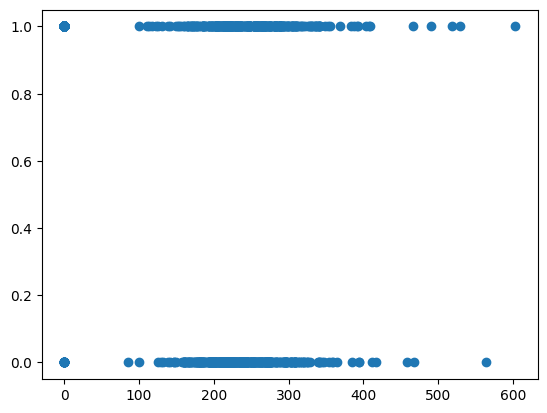

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df["Cholesterol"],df["HeartDisease"])
plt.show()

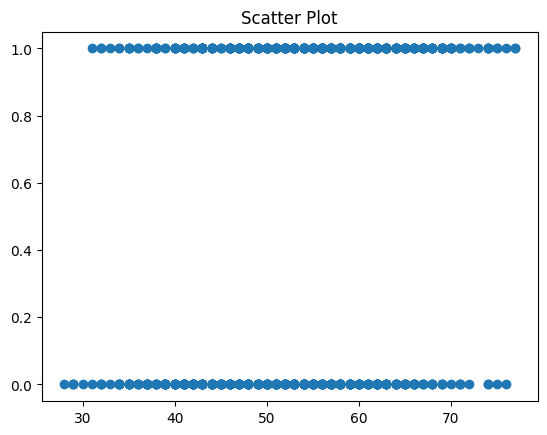

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df["Age"],df["HeartDisease"])
plt.title("Scatter Plot")
plt.show()

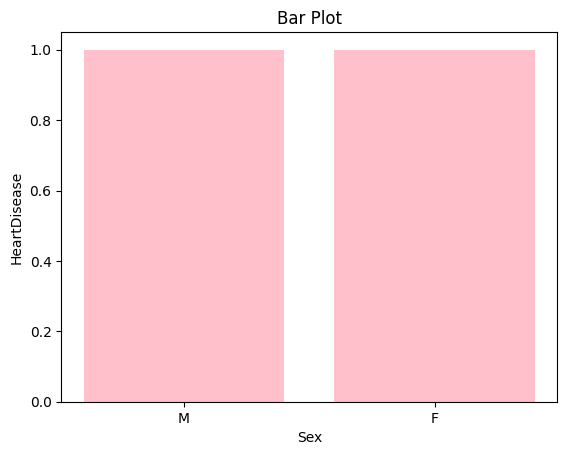

In [ ]:
plt.bar(df["Sex"],df["HeartDisease"],color="pink")
plt.title("Bar Plot")
plt.xlabel("Sex")
plt.ylabel("HeartDisease")
plt.show()

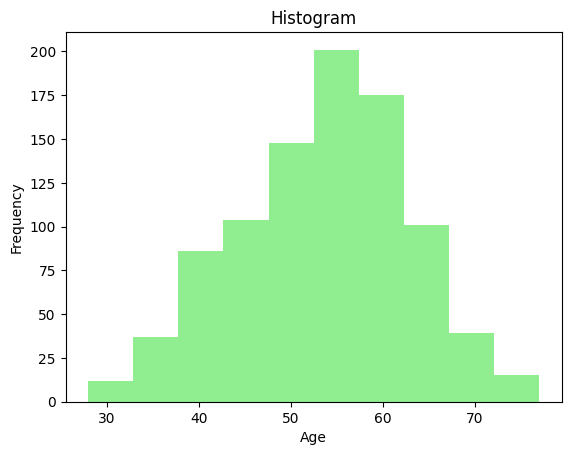

In [ ]:
plt.hist(df["Age"],bins=10,color="lightgreen")
plt.title("Histogram")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

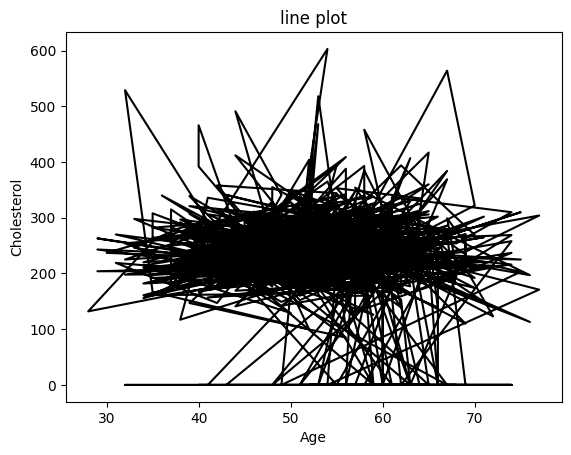

In [ ]:
plt.plot(df["Age"],df["Cholesterol"], color="black")
plt.title("line plot")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.show()

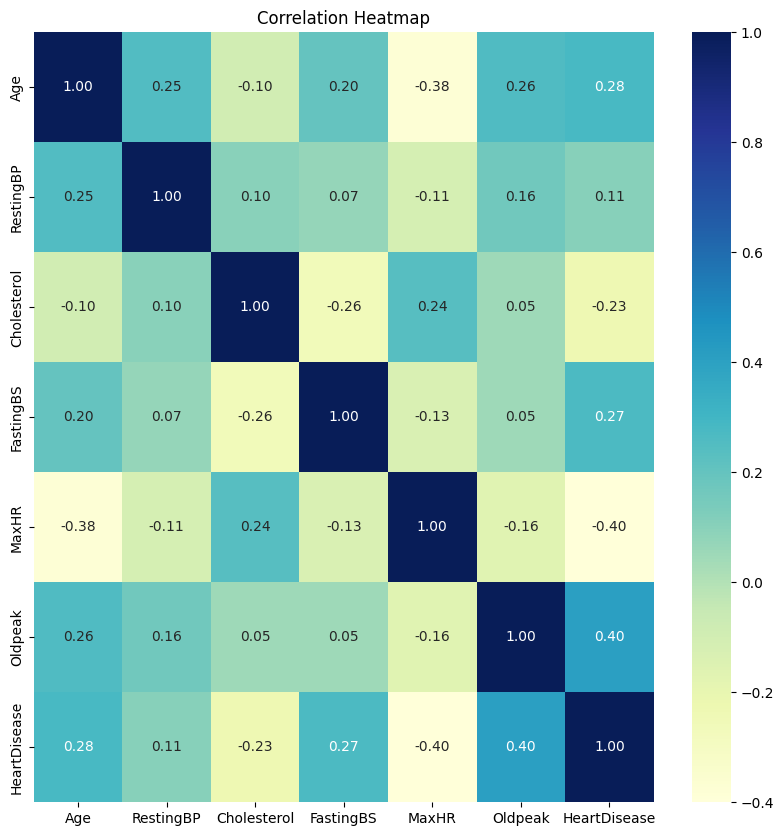

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
